In [2]:
from io import StringIO
import pandas as pd
import numpy as np

cvs_data = '''A,B,C,d
              1.0,2.0,3.0,4.0
              5.0,6.0,,8.0
              0.0,11.0,12.0'''
df = pd.read_csv(StringIO(cvs_data))
df

,A,B,C,d
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [3]:
# 检查NaN列
df.isnull().sum()

A    0
B    0
C    1
d    1
dtype: int64

In [4]:
# values之后转换为array就可将dataFrame转换为矩阵/数组的形式,就可以用于sklearn
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [ 0., 11., 12., nan]])

In [5]:
# 消除NaN样本
df.dropna()

,A,B,C,d
0,1.0,2.0,3.0,4.0


In [6]:
# 通过设置axis,删除NaN列
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [7]:
# 消除所有属性都是NaN的样本
df.dropna(how='all')

,A,B,C,d
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [8]:
# 根据threshold去删除样本
df.dropna(thresh=4)

,A,B,C,d
0,1.0,2.0,3.0,4.0


In [9]:
# 删除在特定列出现NaN的样本
df.dropna(subset=['C'])

,A,B,C,d
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


In [10]:
# 插值
# 使用一定的策略补上缺省值
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0) # 使用特征的均值补充上缺省值.但是这样带来的副作用是,不在符合原样本的分布.常用的策略是most_frequent
imr = imr.fit(df)

C:\software\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
imputed_data = imr.transform(df.values)
print(imputed_data)

[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [ 0.  11.  12.   6. ]]


In [12]:
# 处理分类数据
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [13]:
# 1.映射有序特征:比如size这类特征虽然是非数值型特征,但是内部有顺序的,比如我们假设:XL=L+1=M+2
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1
}
df['size'] = df['size'].map(size_mapping)
# inv_size_mapping={v: k for k, v in size_mapping.items()} 还原原始特征数据
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [14]:
# 另外label也需要映射:
#class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
#df['classlabel'] = df['classlabel'].map(class_mapping)
#df

In [15]:
# 通过LabelEncoder进行类别转换
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [16]:
# 2.离散特征进行oneHot
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [17]:
# 对于color这种不像size一样之间有一定的关联性,采用one-hot的编码形式:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

C:\software\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\software\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [18]:
# 使用pandas的get_dummies来做one-hot
dummies_color = pd.get_dummies(df['color'], prefix= 'color')
df = pd.concat([df, dummies_color], axis=1)
df

,color,size,price,classlabel,color_blue,color_green,color_red
0,green,1,10.1,class1,0,1,0
1,red,2,13.5,class2,0,0,1
2,blue,3,15.3,class1,1,0,0


In [19]:
df.drop(['color'], axis=1, inplace=True)
df

,size,price,classlabel,color_blue,color_green,color_red
0,1,10.1,class1,0,1,0
1,2,13.5,class2,0,0,1
2,3,15.3,class1,1,0,0


In [20]:
# 数据集分割为训练集和测试集
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [21]:
df_wine.columns = ['Class Label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine

,Class Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [22]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
# 统一特征取值范围
# 有一种方法是使用0-1的归一化缩放
# 还有一种是用标准化,以0位中心,标准差为1,对于要以0位中心的数据或label更加适用
# standardScaler只需要fit训练集一次,就能保证在训练集和测试集使用
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [24]:
# 选取特征
# L2正则项可以降低模型的复杂度,而L1正则项会得到较为稀疏的矩阵,相当于是一种特征选择
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)

C:\software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))

Training accuracy:  0.9838709677419355
Test accuracy:  0.9814814814814815


In [26]:
lr.intercept_

array([-0.38376589, -0.15807681, -0.70047026])

In [27]:
lr.coef_

array([[ 0.28006576,  0.        ,  0.        , -0.02795807,  0.        ,
         0.        ,  0.70986798,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23657049],
       [-0.64404102, -0.06872307, -0.05720975,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92670779,
         0.06021616,  0.        , -0.37107133],
       [ 0.        ,  0.0615922 ,  0.        ,  0.        ,  0.        ,
         0.        , -0.63524823,  0.        ,  0.        ,  0.49776293,
        -0.35818229, -0.57222164,  0.        ]])

In [28]:
# 特征选择: 从原始特征集合中选择一个子集合
# 特征抽取: 原始特征空间抽取信息,构成一个新的特征空间
# 序列特征选择算法: 逐步选取和问题最相关的特征
# 序列向后选择算法SBS: 从原始特征集中移除特征,知道达到原始约束的数目:1.初始化k=d; 2.确定评价函数最大的特征x-; 3.从Xk中移除特征x-, k--; 4.知道k=约束值,否则到2
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from itertools import combinations

#SBS类
class SBS(object):
    def __init__(self,estimator,k_features,scoring=accuracy_score,test_size=0.2,random_state=1):
        self.scoring=scoring
        self.estimator=clone(estimator)
        self.k_features=k_features
        self.test_size=test_size
        self.random_state=random_state
        
    def fit(self,X,y):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=self.test_size,random_state=self.random_state)
        dim=X_train.shape[1]
        self.indices_=tuple(range(dim))
        self.subsets_=[self.indices_]
        score=self._calc_score(X_train,X_test,y_train,y_test,self.indices_)
        self.scores_=[score]
        while dim>self.k_features:
            scores=[]
            subsets=[]
            for p in combinations(self.indices_,r=dim-1):
                score=self._calc_score(X_train,X_test,y_train,y_test,p)
                scores.append(score)
                subsets.append(p)
            best=np.argmax(scores)
            self.indices_=subsets[best]
            self.subsets_.append(self.indices_)
            dim-=1
            self.scores_.append(scores[best])
        self.k_score_=self.scores_[-1]
        return self
    
    def transform(self,X):
        return X[:,self.indices_]
    
    def _calc_score(self,X_train,X_test,y_train,y_test,indices):
        self.estimator.fit(X_train[:,indices],y_train)
        y_pred=self.estimator.predict(X_test[:,indices])
        score=self.scoring(y_test,y_pred)
        return score

In [29]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

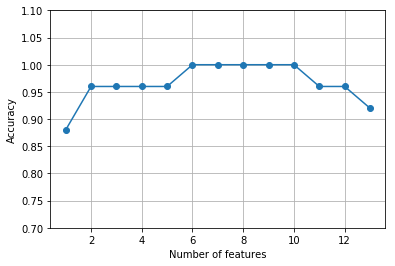

In [30]:
# 这里是Ein
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [31]:
k6 = list(sbs.subsets_[7])
k6

[0, 1, 2, 3, 6, 9]

In [32]:
print(df_wine.columns[1:][k6])

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Flavanoids',
       'Color intensity'],
      dtype='object')


In [33]:
knn.fit(X_train_std, y_train)
print('Training accurary:', knn.score(X_train_std, y_train))
print('Test accurary:', knn.score(X_test_std, y_test))

Training accurary: 0.9838709677419355
Test accurary: 0.9444444444444444


In [34]:
knn.fit(X_train_std[:, k6], y_train)
print('Training accurary:', knn.score(X_train_std[:, k6], y_train))
print('Test accurary:', knn.score(X_test_std[:, k6], y_test))

Training accurary: 0.9596774193548387
Test accurary: 0.9444444444444444


In [35]:
# 随机森林评估特征重要性
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
importances = forest.feature_importances_

In [37]:
indeces = np.argsort(importances)[::-1]
indeces # 进行权值排序

array([ 9, 12,  6, 11,  0, 10,  5,  3,  1,  8,  4,  7,  2], dtype=int64)

In [38]:
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f'%(f+1, 30, feat_labels[f], importances[indeces[f]]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


In [39]:
# 随机森林有一个transform方法通过一个阈值参数进行特征选择
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(forest, prefit=True)
X_selected = model.transform(X_train)
X_selected.shape

(124, 6)

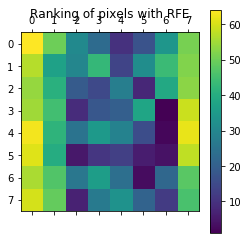

In [40]:
# 特征递归消除RFE
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
 
# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target
 
# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)
 
# Plot pixel ranking
plt.matshow(ranking)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()
